In [1]:
 %matplotlib inline
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

a_x = 0.05
a_y= 10

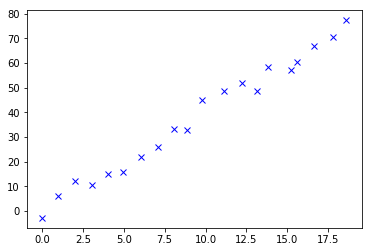

In [2]:
# Step 1. Get Some data

# Set the random seed so the results stay they same between runs for testing and debugging
# rand.seed(4021)
data =  np.array([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])
# data = np.array([[2.5, 2.4],
# [0.5, 0.7],
# [2.2, 2.9],
# [1.9, 2.2],
# [3.1, 3.0],
# [2.3, 2.7],
# [2, 1.6],
# [1, 1.1],
# [1.5, 1.6],
# [1.1, 0.9]])
# print(data)

plt.plot(data[:, 0], data[:, 1], 'bx')

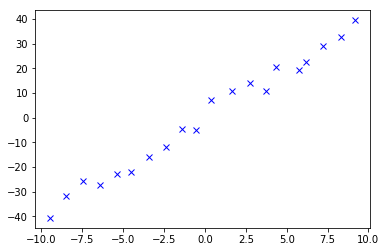

In [3]:
# Step 2. Subtract the mean from each column of the dataset
means = np.mean(data.T, axis=1)
mean_subtracted = data - means
plt.plot(mean_subtracted[:, 0], mean_subtracted[:, 1] ,'bx')

[[ -9.45185945 -40.58765149]
 [ -8.46829512 -31.70062431]
 [ -7.43817581 -25.50045991]
 [ -6.42139656 -27.44763196]
 [ -5.40255193 -22.72467263]
 [ -4.52490753 -21.81353835]
 [ -3.40200408 -15.75775636]
 [ -2.37801379 -12.00654377]
 [ -1.39757266  -4.43534083]
 [ -0.56954481  -4.99073818]
 [  0.35447275   7.06466587]
 [  1.65459386  11.04337445]
 [  2.75124291  14.18387946]
 [  3.70746226  10.88253631]
 [  4.36742802  20.40057238]
 [  5.74569359  19.31701443]
 [  6.15400985  22.75778585]
 [  7.21303809  29.17830785]
 [  8.34104078  32.61909721]
 [  9.16533963  39.51772399]]


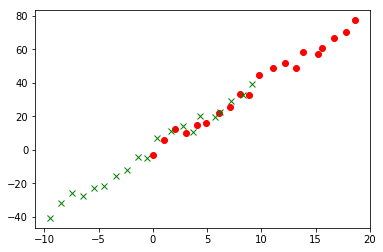

In [4]:
print(mean_subtracted)
plt.plot(data[:, 0], data[:, 1], 'ro')
plt.plot(mean_subtracted[:, 0], mean_subtracted[:, 1], 'gx')

In [5]:
# Step 3: Calculate the covariance matrix
cov_matrix = np.cov(mean_subtracted.T)
cov_matrix

array([[ 34.02739608, 137.66868022],
       [137.66868022, 566.36696955]])

In [6]:
# Step 4: Calculate the eigenvectors and eigenvalues of the covariance matrix
eig_values, eig_vectors = eig(cov_matrix)

print("Eigen Vectors:\n%s" % eig_vectors)
print("Eigen Values:\n%s" % eig_values)

Eigen Vectors:
[[-0.9716545  -0.23640545]
 [ 0.23640545 -0.9716545 ]]
Eigen Values:
[5.32335224e-01 5.99862030e+02]


In [7]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
    
print(eig_pairs)

Eigenvalues in descending order:
599.8620304054369
0.5323352236653136
[(599.8620304054369, array([-0.23640545, -0.9716545 ])), (0.5323352236653136, array([-0.9716545 ,  0.23640545]))]


[99.91133573961716, 0.08866426038284433]


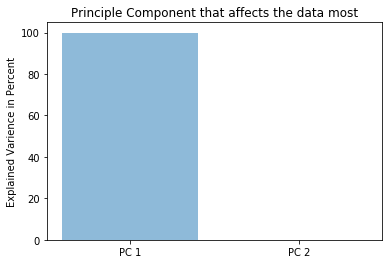

In [8]:
# Calculate the weight of each of eigenvectors.
# This indicates how much each eigenvector or principle component affects the data.
tot = sum(eig_values)
var_exp = [(i / tot)*100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)

objects = ('PC 1', 'PC 2')
y_pos = np.arange(len(eig_values))
performance = eig_vectors
 
plt.bar(y_pos, var_exp, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Explained Varience in Percent')
plt.title('Principle Component that affects the data most')
 
plt.show()

The eigenvector with the highest eigenvalue is the principle component of the dataset. 

With principle components found. Next step is to reduce the dimensionality of the data by creating a `feature vector`. This feature vector is really a matrix of vectors. 

It is constructed by taking the eigenvectors you want to keep from the list of eigenvectors you found.

By taking a subset of all the eigenvectors you can reduce the dimensionality without too much loss in overall data. 



In [9]:
full_feature_matrix = np.hstack((eig_pairs[0][1].reshape(2,1), 
                                 eig_pairs[1][1].reshape(2,1)))

feature_matrix_pc1 = eig_pairs[0][1].reshape(2,1)

print('Feature Matrix:\n', full_feature_matrix)
print()
print('Feature Matrix with PC 1 only:\n')
print(feature_matrix_pc1)

Feature Matrix:
 [[-0.23640545 -0.9716545 ]
 [-0.9716545   0.23640545]]

Feature Matrix with PC 1 only:

[[-0.23640545]
 [-0.9716545 ]]


[[ 0.         -2.78971022]
 [ 0.98356434  6.09731695]
 [ 2.01368364 12.29748136]
 [ 3.03046289 10.3503093 ]
 [ 4.04930752 15.07326863]
 [ 4.92695192 15.98440291]
 [ 6.04985537 22.0401849 ]
 [ 7.07384566 25.79139749]
 [ 8.05428679 33.36260044]
 [ 8.88231464 32.80720308]
 [ 9.8063322  44.86260713]
 [11.10645332 48.84131572]
 [12.20310236 51.98182073]
 [13.15932171 48.68047757]
 [13.81928747 58.19851364]
 [15.19755304 57.1149557 ]
 [15.6058693  60.55572712]
 [16.66489754 66.97624911]
 [17.79290023 70.41703848]
 [18.61719908 77.31566525]]

[[ 2.71063448e+00 -6.15700541e+00 -1.24249489e+01 -1.07733425e+01
  -1.56032876e+01 -1.66960753e+01 -2.28456636e+01 -2.67326230e+01
  -3.43209981e+01 -3.39770940e+01 -4.59092244e+01 -5.00825102e+01
  -5.33932498e+01 -5.04115404e+01 -5.98158024e+01 -5.90887880e+01
  -6.25285572e+01 -6.90174463e+01 -7.26273708e+01 -7.95253212e+01]
 [-6.59502705e-01  4.85754259e-01  9.50586866e-01 -4.97693351e-01
  -3.71124984e-01 -1.00849501e+00 -6.67949313e-01 -7.76106975

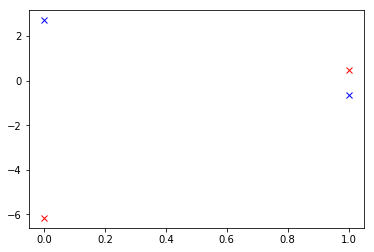

In [10]:
# Step 5: Choosing components and forming a feature vector and projecting data
adjust_data_with_all_pcs = full_feature_matrix.T.dot(data.T)
adjust_data_with_pc1 = feature_matrix_pc1.T.dot(data.T)

print(data)
print()
print(adjust_data_with_all_pcs)
print()
print(adjust_data_with_pc1)
print()
plt.plot(adjust_data_with_all_pcs[:, 0], 'bx')
plt.plot(adjust_data_with_all_pcs[: ,1], 'rx')

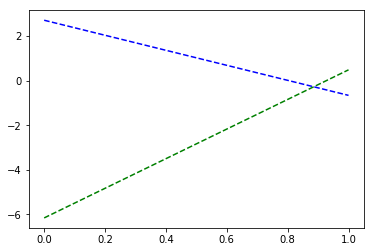

In [11]:
plt.plot(adjust_data_with_all_pcs[:, 0], 'b--')
plt.plot(adjust_data_with_all_pcs[: ,1], 'g--')

[[ 41.67164521  -0.41120034]
 [ 32.80400532   0.73405663]
 [ 26.53606187   1.19888923]
 [ 28.1876682   -0.24939098]
 [ 23.3577231   -0.12282262]
 [ 22.26493545  -0.76019264]
 [ 16.11534715  -0.41964694]
 [ 12.22838768  -0.52780461]
 [  4.64001266   0.30941901]
 [  4.9839167   -0.62643694]
 [ -6.94821366   1.32570048]
 [-11.12149946   1.00302036]
 [-14.43223909   0.67988889]
 [-11.45052964  -1.02968146]
 [-20.85479169   0.57917545]
 [-20.12777724  -1.01618149]
 [-23.56754646  -0.59950671]
 [-30.05643558  -0.11066986]
 [-33.66636003  -0.39327738]
 [-40.56431049   0.43666191]]
[[ 41.67164521]
 [ 32.80400532]
 [ 26.53606187]
 [ 28.1876682 ]
 [ 23.3577231 ]
 [ 22.26493545]
 [ 16.11534715]
 [ 12.22838768]
 [  4.64001266]
 [  4.9839167 ]
 [ -6.94821366]
 [-11.12149946]
 [-14.43223909]
 [-11.45052964]
 [-20.85479169]
 [-20.12777724]
 [-23.56754646]
 [-30.05643558]
 [-33.66636003]
 [-40.56431049]]
[[-0.23640545 -0.9716545 ]]
[[-0.23640545 -0.9716545 ]
 [-0.9716545   0.23640545]]


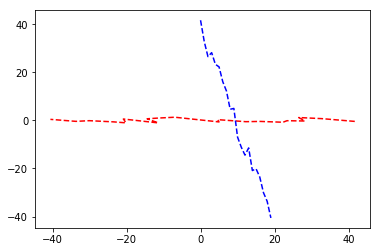

In [12]:
from sklearn.decomposition import PCA as sklearnPCA
pca_2_comp = sklearnPCA(n_components=2)
pc2_comp_sklearn = pca_2_comp.fit_transform(data)
print(pc2_comp_sklearn)
plt.plot(pc2_comp_sklearn[:, 0], pc2_comp_sklearn[:, 1] , '--r')

pca_1_comp = sklearnPCA(n_components=1)
pc1_comp_sklearn = pca_1_comp.fit_transform(data)
print(pc1_comp_sklearn)
plt.plot(pc1_comp_sklearn[:, 0], '--b')
print(pca_1_comp.components_)
print(pca_2_comp.components_)

In [13]:
class PCA:
    
    def __init__(self, n_components):
        self.n_components = n_components
        self.eigenvectors = None
        self.eigenvalues = None
        self.eig_pairs = None
        
    def fit(self, data):
        """Get eigenvectors and eigenvalues on the dataset provided"""

        # Subtract the mean from each column of the dataset
        means = np.mean(data.T, axis=1)
        mean_subtracted = data - means
        
        # Calculate the covariance matrix
        cov_matrix = np.cov(mean_subtracted.T)
        
        # Calculate the eigenvectors and eigenvalues based on covariance matrix
        self.eigenvalues, self.eigenvectors = eig(cov_matrix)
        
        # Make a list of (eigenvalue, eigenvector) tuples
        eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]

        # Sort the (eigenvalue, eigenvector) tuples from high to low
        eig_pairs.sort()
        eig_pairs.reverse()
        self.eig_pairs = eig_pairs

        # Visually confirm that the list is correctly sorted by decreasing eigenvalues
        print('Eigenvalues in descending order:')
        for i in eig_pairs:
            print(i[0])
        
        return self.eigenvalues, self.eigenvectors
    
    def transform(self, eigenvalues, eigenvectors):
        """Reduce dimensionality of data give a list of eigenvectors and eigenvalues"""
        feature_matrix = self.eig_pairs[: self.n_components]
        projected_data = feature_matrix[0][1].T.dot(data.T)
        plt.plot(projected_data, 'bx')
        
        return projected_data


Eigenvalues in descending order:
599.8620304054369
0.5323352236653136
[  2.71063448  -6.15700541 -12.42494886 -10.77334253 -15.60328763
 -16.69607527 -22.84566358 -26.73262305 -34.32099807 -33.97709403
 -45.90922438 -50.08251019 -53.39324982 -50.41154036 -59.81580242
 -59.08878797 -62.52855718 -69.0174463  -72.62737075 -79.52532122]


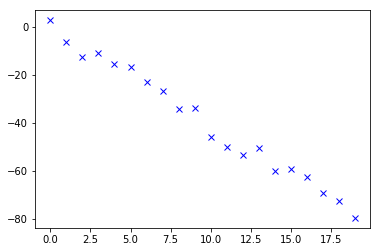

In [14]:
pca_1 = PCA(1)
eig_values, eig_vectors = pca_1.fit(data)
reduced_data = pca_1.transform(eig_values, eig_vectors)
print(reduced_data)

Eigenvalues in descending order:
599.8620304054369
0.5323352236653136
[  2.71063448  -6.15700541 -12.42494886 -10.77334253 -15.60328763
 -16.69607527 -22.84566358 -26.73262305 -34.32099807 -33.97709403
 -45.90922438 -50.08251019 -53.39324982 -50.41154036 -59.81580242
 -59.08878797 -62.52855718 -69.0174463  -72.62737075 -79.52532122]


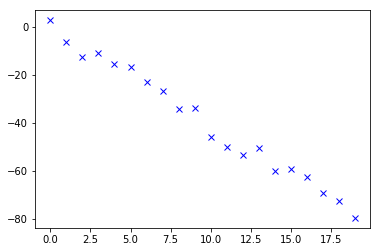

In [15]:
pca_1 = PCA(2)
eig_values, eig_vectors = pca_1.fit(data)
reduced_data = pca_1.transform(eig_values, eig_vectors)
print(reduced_data)